# Advanced methods in *python*: classes and libraries
This tutorial presents an introduction to advanced methods in _python_ for the MSc Statistics students (class of 2022). 

> **Authors:** Yu Luo, Francesco Sanna Passino  
> **Affiliation:** Department of Mathematics, Imperial College London  
> **Email:** `{yu.luo,f.sannapassino}@imperial.ac.uk`

## 1. Classes

In previous notebooks in this tutorial, *python* objects such as integers, lists, dictionaries, *NumPy* arrays, and functions have been introduced. Every object has a *type*, as discussed in the tutorial about the basics of *python*. Object types are created using *classes*: a class is the building block of all data structures in *python*. In particular, creating a new class creates a new type of object, allowing new instances of that type to be made. This shows that *python* has a different programming paradigm compared to *R*:
* *python* is an *object-oriented* programming language (OOP): objects contain data and code (data as attributes, and code as methods); 
* *R* is a *functional* programming language: programs are constructed by applying and composing functions.

Importantly, classes and objects represent *things* (a person, a car, *a statistical model*), defined by attributes (data) given to them and methods (functions) to operate on them. The next section will give a simple example of a class, followed by a more advanced example on a univariate Gaussian mixture model fitted with the EM algorithm. 

### 1.1. A simple example of a class: `person`
In *python*, classes are defined using the command `class`, followed by a class *name*. When a new instance of a  class is created, the object must be initialised. Therefore, the first method (*function*) defined in each class is denoted `__init__`, which *automatically* runs when the class is created. The following code chunk defines a class `person`, with attributes (*data*) name and age:

In [1]:
class person(object):
    def __init__(self, name, age):
        self.name = name
        self.age = age

Note that the class itself is denoted with the keyword `self`. This is a convention in *python* (other programming languages use other keywords, for example `this`), but *any* other keyword can be used instead. 

A new instance of the class `person` can be simply defined by calling `person`, providing data attributes for `name` and `age`:  

In [2]:
FSP = person(name='Francesco', age=27)
print('My name is', FSP.name, 'and I am', FSP.age, 'years old.')
print(type(FSP))
print(FSP)

My name is Francesco and I am 27 years old.
<class '__main__.person'>


The output of `print` is very uninformative. This can be changed via `__str__`:

In [3]:
class person(object):
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        return 'This person is ' + self.name + ' and they are ' + str(self.age) + ' years old.'

In [4]:
FSP = person(name='Francesco', age=27)
print(FSP)

This person is Francesco and they are 27 years old.


Data attributes in the `person` class can be changed easily:

In [5]:
FSP.name = 'Frank'
print(FSP.name)

Frank


A better approach is to define methods to set and get the name within the class: 

In [6]:
class person(object):
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        return 'This person is ' + self.name + ' and they are ' + str(self.age) + ' years old.'
    
    def get_name(self):
        return self.name

    def set_name(self, name):
        self.name = name

In [7]:
FSP = person(name='Francesco', age=27)
print(FSP.get_name())
FSP.set_name('Frank')
print(FSP.get_name())

Francesco
Frank


As described before, it is possible to define *methods*, representing functions associated with the class. For example, the method `age_difference` calculates the age difference (in absolute values) between two `person` objects. Similarly, the method `get_initial` gets the first letter of the name and adds it to the class as data attribute `initial`. 

In [8]:
import numpy as np

class person(object):
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        return 'This person is ' + self.name + ' and they are ' + str(self.age) + ' years old.'
    
    def get_name(self):
        return self.name

    def set_name(self, name):
        self.name = name
        
    def age_difference(self, person):
        return np.abs(self.age - person.age)
    
    def get_initial(self):
        self.initial = self.name[0]

In [9]:
FSP = person(name='Francesco', age=27)
Lewis_Hamilton = person(name='Lewis', age=37)
FSP.age_difference(Lewis_Hamilton)

10

Alternatively:

In [10]:
person.age_difference(FSP, Lewis_Hamilton)

10

Note that `FSP` does not have the attribute `initial` at this stage (check the output of `hasattr` with argument `initial`!). The initial is only available after running `get_initial`:

In [11]:
print(hasattr(FSP,'initial'))
FSP.get_initial()
print(hasattr(FSP,'initial'))
print(FSP.initial)

False
True
F


### 1.2. A class for univariate Gaussian mixture models
In this section, a class for fitting univariate Gaussian mixture models is described. In Gaussian mixture models, it is assumed that the observations are generated from a mixture of $K$ Gaussian distributions with unknown mean and variance. The distributions are weighted by mixing proportions $(\pi_1,\dots,\pi_K)$, where $\pi_k\geq 0$ and $\sum_{k=1}^K\pi_k=1$, and each distribution has its own mean $\mu_k$ and variance $\sigma^2_k,\ k=1,\dots,K$. The density of an individual observation from a univariate Gaussian mixture is:
$$
f(x) = \sum_{k=1}^K \pi_k \phi(x; \mu_k, \sigma^2_k), 
$$
where $\phi(x;\mu,\sigma^2)$ is the PDF of a Gaussian distribution with mean $\mu$ and variance $\sigma^2$, evaluated at $x$.

Gaussian mixture models are traditionally used for *clustering*, which is the task of dividing observations into meaningful groups. In the following code box, $n=500$ data points are simulated from a 60-40 mixture of two Gaussian distributions with parameters $(0,0.5)$ and $(4,1)$ respectively:

In [12]:
## Number of data points
n = 500
## Group-specific parameters
mu = np.array([0,4])
sigma2 = np.array([0.5, 1])
pi = np.array([0.6,0.4])
## Group allocation
z = np.random.choice(2,size=n)
## Simulate data from the model
x = np.random.normal(loc=mu[z], scale=np.sqrt(sigma2[z]))

The histogram, density estimate, and scatterplot clearly show that there are two groups in the simulated data:

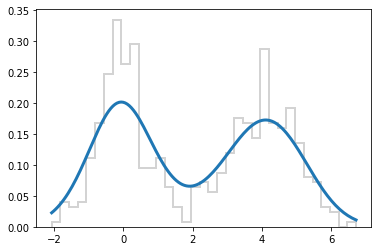

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
plt.hist(x, bins=35, color='lightgray', density=True, histtype=u'step', lw=2)
kernel = kde(x, bw_method='silverman')
positions = np.linspace(np.nanmin(x),np.nanmax(x), 150)
plt.plot(positions, kernel(positions), lw=3, label='Gaussian KDE')
plt.show()

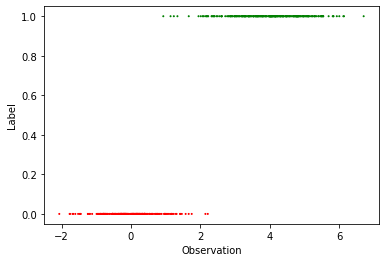

In [14]:
plt.scatter(x,z,c=np.array(['red','green'])[z], s=1)
plt.ylabel('Label'); plt.xlabel('Observation')
plt.show()

The inferential objective is usually to recover the latent groups $\mathbf z=(z_1,\dots,z_n)$, where $z_i\in\{1,\dots,K\}$. 

GMMs do not admit a closed form solution for the maximum likelihood estimator. Therefore, iterative algorithms must be used for estimation, such as the expectation-maximisation (EM) algorithm. The EM algorithm for a univariate Gaussian mixture consists in the following two steps, repeated iteratively:

* E-step - Given parameter estimates $\hat\pi_{k,t},\hat\mu_{k,t}, \hat\sigma^2_{k,t}$, $k=1,\dots,K$, calculate the *responsibilities* $\zeta_{i,k,t} \propto \hat\pi_{k,t} \phi(x; \hat\mu_{k,t}, \hat\sigma^2_{k,t})$ for each observation.
* M-step - Calculate updated parameter estimates:
\begin{align}
\hat\pi_{k,t+1} = \frac{1}{n}\sum_{i=1}^{n} \zeta_{i,k,t}, & & 
\hat\mu_{k,t+1} = \frac{\sum_{i=1}^{n} \zeta_{i,k,t} x_i}{\sum_{i=1}^{n} \zeta_{i,k,t}}, & &
\hat\sigma^2_{k,t+1} = \frac{\sum_{i=1}^{n} \zeta_{i,k,t} (x_i-\hat\mu_{k,t+1})^2}{\sum_{i=1}^{n} \zeta_{i,k,t}}.
\end{align}

The following code block contains a class for univariate GMMs, fitted via the EM algorithm:

In [15]:
import numpy as np
import scipy.stats as stats

class gmm:
    def __init__(self, K):
        self.K = K
        
    def fit(self, x, iterations=100, random_seed=111):
        # Training data
        self.x = x
        self.n = len(x)
        # Initialise zeta at random
        np.random.seed(random_seed)
        self.zeta = np.random.dirichlet(size=self.n, alpha = np.ones(self.K))
        # Initialise parameter estimates from zeta
        self.M_step()
        # Repeat EM steps for iterations times
        for _ in range(iterations):
            print('Iteration:', _+1, end='\r')
            self.E_step()
            self.M_step()

    def E_step(self):
        # Calculate responsibilities for each observation
        for i in range(self.n):
            self.zeta[i] = np.multiply(self.pi, stats.norm.pdf(self.x[i], loc=self.mu, scale=self.sigma))
            self.zeta[i] /= np.sum(self.zeta[i]) 

    def M_step(self):
        # Update parameter estimates
        self.pi = np.mean(self.zeta, axis=0)
        self.mu = np.sum(self.zeta * self.x.reshape(-1,1), axis=0) / np.sum(self.zeta, axis=0)
        self.sigma = np.sqrt(np.sum(self.zeta * np.power(np.subtract.outer(self.x, self.mu), 2),\
                                    axis=0) / np.sum(self.zeta, axis=0))
            
    def get_labels(self):
        # Obtain estimated labels
        return np.argmax(self.zeta, axis=1)
    
    def predict(self, x_test):
        # Predict labels for a new set of observations
        zeta_pred = np.zeros((len(x_test), self.K))
        for i in range(len(x_test)):
            zeta_pred[i] = np.multiply(self.pi, stats.norm.pdf(x_test[i], loc=self.mu, scale=self.sigma))
            zeta_pred[i] /= np.sum(zeta_pred[i])
        return np.argmax(zeta_pred, axis=1)
            
    def fit_predict(self, x, iterations=100):
        # Fit GMM and return estimated labels
        self.fit(x, iterations)
        return self.get_labels()

The model is fitted to the simulated data `x` via the following commands:

In [16]:
m = gmm(K=2)
m.fit(x)

Labels are estimated via `get_labels()`:

In [17]:
z_est = m.get_labels()
print('Accuracy rate =', 100 * np.max([np.mean(z_est == z), np.mean(z_est != z)]), '%')

Accuracy rate = 98.2 %


Note that the labels in `z_est` are *not* identical to those in `z`, but the estimated groups are extremely similar (the `0`s and `1`s are just 'swapped'). In order to evaluate the performance of the clustering algorithm, the adjusted Rand index (ARI) could be used: 

In [18]:
from sklearn.metrics import adjusted_rand_score as ari
print('Adjusted Rand Index =', round(ari(z, z_est), 4))

Adjusted Rand Index = 0.9292


The same output for `z_est` can be obtained by running `fit_predict`, which is a wrapper for `fit` & `get_labels`:

In [19]:
z_est2 = m.fit_predict(x)

In [20]:
np.all(z_est == z_est2) ## np.all checks if *all* elements in a boolean vector are True

True

If new observations are obtained, the labels can be predicted with the following commands:

In [21]:
np.random.seed(177)
## Group allocation for new data 
z_new = np.random.choice(2,size=100)
## Simulate new data from the model
x_new = np.random.normal(loc=mu[z_new], scale=np.sqrt(sigma2[z_new]))
## Predict labels for new data points
z_new_est = m.predict(x_new)
## Calculate ARI for new data points
print('* New data points *\nAdjusted Rand Index =', round(ari(z_new, z_new_est), 4))

* New data points *
Adjusted Rand Index = 0.8448


Note that the behaviour of the class `gmm` is very similar to `GaussianMixture`, implemented in `sklearn.mixture`:

In [22]:
from sklearn.mixture import GaussianMixture
m_sklearn = GaussianMixture(n_components=2).fit(x.reshape(-1,1))
z_est_sklearn = m_sklearn.predict(x.reshape(-1,1))
z_new_est_sklearn = m_sklearn.predict(x_new.reshape(-1,1))
print('* Training data points *\nARI =', round(ari(z, z_est_sklearn), 4))
print('\n* New data points *\nARI =', round(ari(z_new, z_new_est_sklearn), 4))

* Training data points *
ARI = 0.9369

* New data points *
ARI = 0.96


## 2. Libraries

In data analysis projects, it is very useful to keep utility functions in external files that are separate from the main script, and just import those in the main file. In *R*, this can be simply done by running the contents of the external script with the command `source` with the path to the file as argument. In *python*, this is not as straightforward: if the external file is in the current working directory (obtained with `os.getcwd()`), one could simply run `import namefile` (if the external file name is `namefile.py`). Otherwise, the working directory has to be changed to the location of the external file (with `os.chdir(path)`), and the file imported via `import namefile`. For example, the file `gaussian_mixture` in `notebooks` contains the class `gmm` defined in the previous section. This can be imported using the standard notation used for libraries:

In [23]:
from gaussian_mixture import gmm
import gaussian_mixture
from gaussian_mixture import *
m = gaussian_mixture.gmm(K=2)
print(type(m))

<class 'gaussian_mixture.gmm'>


This is cumbersome and not ideal if the same utility functions are required across multiple projects and tasks. As a solution, it is very easy to create and install *user-defined libraries* in *python*. A user-defined library could be installed in editable mode using the command `pip -e` in a terminal. In this tutorial, an example library has been defined in the directory `lib/`. This library is called `my_library`, and it can be installed by running the following `bash` command from the top of the `pystats_msc` directory:
```
pip install -e lib/
```
The library can then be imported in *any python* session, just by running `import my_library`: 

In [24]:
import my_library

The structure of the library is simple. First, check the contents of the file `lib/setup.py`: it contains the name and version of the library, and its dependencies (libraries required for `my_library` to work - in this case, *NumPy* and *SciPy*). In this file, the library `setuptools` is used, which is designed to facilitate the packaging of *python* projects. Second, `lib/my_library/__init__.py` contains the classes and functions that will be available in `my_library` (in this case, `test` and `normalise` from `utils.py` and *all* objects defined in `gaussian_mixture.py`). Third, the files `lib/my_library/utils.py` and `lib/my_library/gaussian_mixture.py` contain the definitions of the objects imported in `__init__.py`. This is all it is needed to have a *python* library! 

After installations, `my_library` can be used like any other library:

In [25]:
my_library.test()

Hello MSc Statistics!


In [26]:
y = np.array([1,3,1,2])
print(my_library.normalise(y))

[0.14285714 0.42857143 0.14285714 0.28571429]


In [27]:
z_est = my_library.gmm(K=2).fit_predict(x)
print('\nAdjusted Rand Index =', ari(z, z_est))

Iteration: 100
Adjusted Rand Index = 0.9291542212855101


For summer projects, or any other data analysis project in *python*, it is *highly recommended* to create your own library. 

## Final exercise
In this exercise, you will add to the library `my_library` a `class` for Gibbs sampling from a bivariate Gaussian distribution. The bivariate Gaussian will be parametrised as follows:
\begin{equation}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \sim \mathbb N_2\left(\begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}, 
\begin{bmatrix} \sigma_1^2 & \rho\sigma_1\sigma_2 \\ \rho\sigma_1\sigma_2 & \sigma_2^2 \end{bmatrix}\right),
\end{equation}
where $\mu_1,\mu_2\in\mathbb R$, $\sigma_1,\sigma_2\in\mathbb R_+$ and $\rho\in(-1,1)$. 
1. Following the example in the file `gaussian_mixture.py`, create a _python_ file `bivariate_gaussian.py` (using any text editor that you like, for example PyCharm or Visual Studio Code, both available with Anaconda). 
2. In the file `bivariate_gaussian.py`, define a class `biv_gauss`, which is initialised with 5 parameters: `mu1`, `mu2`, `sigma1`, `sigma2` and `rho`. 
3. Add a method `gibbs_sampling` to the class `biv_gauss`, which takes as argument the integer number of samples `n` to obtain from the distribution, and the starting points `x1` and `x2`. The method should return `n` samples from the distribution, obtained using Gibbs sampling. To implement your Gibbs sampler, you can use the following equations for the conditional distributions of Gaussian random variables:
\begin{align}
x_1\vert x_2\sim\mathbb N\left(\mu_1 + \frac{\rho\sigma_1}{\sigma_2}(x_2 - \mu_2), (1-\rho^2)\sigma_1^2\right),
& & 
x_2\vert x_1\sim\mathbb N\left(\mu_2 + \frac{\rho\sigma_2}{\sigma_1}(x_1 - \mu_1), (1-\rho^2)\sigma_2^2\right).
\end{align}
4. Add your file and class to `lib/my_library/__init__.py`.
5. Test `my_library.biv_gauss`. Does it return samples from the target distribution? What happens if the initial values are chosen to be far from the true mean of the distribution? 